In [3]:
#this is to import dataframe from other notebooks
#before importing we need to have converted .ipynb to .py files using the command - 
#!jupyter nbconvert --to script Buildings_Exploratory.ipynb  
#at the end of each .ipynb file

import Agent_Data_First_Look as agents
import Buildings_Exploratory as build

0.19.1
1.11.1
3.12
dict_keys(['building1'])
Counter({'box': 5024, 'polygon': 855}) Counter({'grey': 5024, 'off_white': 843, 'black': 12})
Counter({'polygon': 576}) Counter({'off_white': 514, 'black': 62})
Counter({'box': 576}) Counter({'off_white': 576})
dict_keys(['type', 'geometries'])
obstacle
<class 'list'>
<class 'dict'>
6461
3
[{'name': 'NoName10', 'collision_geometry': {'type': 'box', 'dims': [4.150000000000006, 0.15, 2.99], 'material': 'grey'}, 'config': {'position': [114.325, -45.14, 7.5], 'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0]}}, {'name': 'NoName12', 'collision_geometry': {'type': 'box', 'dims': [3.6099999999999994, 0.15, 2.99], 'material': 'grey'}, 'config': {'position': [116.4, -46.945, 7.5], 'orientation': [0.7071067811865476, 0.7071067811865475, 0.0, 0.0]}}, {'name': 'NoName19', 'collision_geometry': {'type': 'box', 'dims': [47.69000000000001, 0.15, 2.99], 'material': 'grey'}, 'config': {'position': [92.445, -62.4, 7.5], 'orientation': [1.0, 0.0, 0.0, 0.0]}

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
exits = build.df
agents = agents.df

In [6]:
agents.head()

,sec,agent_id,agent_type,has_luggage,is_disabled,X,Y,Z,velocity,queue_id,lookUp_X,lookUp_Y
0,70201,0,4,0,0,105.955,20.712,7.0,0.586,-1,105.500,22.130
1,70201,8,4,0,0,82.995,14.989,1.0,0.720,-1,83.495,18.265
2,70201,16,1,0,0,49.066,-72.638,1.0,0.737,-1,49.822,-72.954
3,70201,24,1,0,0,111.617,28.309,10.0,2.944,-1,108.060,30.175
4,70201,32,1,0,0,108.920,34.867,4.0,1.386,-1,103.980,32.855


In [192]:
df = exits
#this process is to find out the total centroid of each entrance/exit
df['mean_x'] = df['x'].apply(np.mean)
df['mean_y'] = df['y'].apply(np.mean)
df['mean_z'] = df['z'].apply(np.mean)
df['centroid'] = df[['mean_x','mean_y','mean_z']].apply(tuple,axis=1)
exits = df.drop(['mean_x','mean_y','mean_z'],axis=1)
exits.head()

,name,no_of_triangles,triangles,x,y,z,centroid
0,entry__exit_4_58,6,"[(100.6, -17.01, 6.0), (100.6, -11.75, 6.0), (...","[100.6, 100.6, 92.88, 100.6, 92.88, 92.88]","[-17.01, -11.75, -11.75, -17.01, -11.75, -17.01]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(96.74, -14.38, 6.0)"
2,entry_exit_7_455,6,"[(120.12, 60.33, 6.0), (122.93, 64.5, 6.0), (1...","[120.12, 122.93, 120.16, 120.12, 123.0, 122.93]","[60.33, 64.5, 64.5, 60.33, 60.28, 64.5]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(121.543333333, 62.4066666667, 6.0)"
4,entry_exit_stairs_544,6,"[(46.24, 9.3, 6.0), (53.04, 9.3, 6.0), (53.04,...","[46.24, 53.04, 53.04, 46.24, 53.04, 46.08]","[9.3, 9.3, 17.1, 9.3, 17.1, 16.96]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(49.6133333333, 13.1766666667, 6.0)"
6,entry_exit_591,9,"[(107.77, 10.18, 6.0), (107.42, 16.32, 6.0), (...","[107.77, 107.42, 103.53, 103.54, 107.77, 107.7...","[10.18, 16.32, 16.7, 9.3, 8.9, 10.18, 9.3, 10....","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(105.848888889, 11.9733333333, 6.0)"
8,exit_entry_1_1002,6,"[(32.3, -20.64, 6.0), (36.34, -11.79, 6.0), (3...","[32.3, 36.34, 32.3, 32.3, 36.36, 36.34]","[-20.64, -11.79, -11.75, -20.64, -20.75, -11.79]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]","(34.3233333333, -16.2266666667, 6.0)"


# Simulation Snapshots

In [42]:
agents.iloc[1]

sec            70201.000
agent_id           8.000
agent_type         4.000
has_luggage        0.000
is_disabled        0.000
X                 82.995
Y                 14.989
Z                  1.000
velocity           0.720
queue_id          -1.000
lookUp_X          83.495
lookUp_Y          18.265
Name: 1, dtype: float64

In [126]:
#diving the dataset be secs
timebrac=[]
start_time=70201
for i in range(max (agents['sec'])-min(agents['sec'])):
    time=start_time+i
    new=[]
    num=0
    for j in agents['sec'].get_values():
        if j==time:
            new.append(num)
        num=num+1    
    timebrac.append(new)        
        
        

In [129]:
len(timebrac)

1198

In [130]:
agents.iloc[timebrac[1]]

,sec,agent_id,agent_type,has_luggage,is_disabled,X,Y,Z,velocity,queue_id,lookUp_X,lookUp_Y
462,70202,0,4,0,0,105.849,21.283,7.000,0.586,-1,105.500,23.400
463,70202,8,4,0,0,83.202,15.678,1.000,0.720,-1,83.495,18.265
464,70202,16,1,0,0,49.746,-72.922,1.000,0.737,-1,49.822,-72.954
465,70202,24,1,0,0,109.301,29.671,10.000,2.944,-1,107.365,30.175
466,70202,32,1,0,0,107.525,34.234,4.000,2.771,-1,104.765,31.930
467,70202,40,1,0,0,75.347,-59.735,16.000,1.432,-1,71.840,-59.505
468,70202,48,1,0,0,-76.748,-28.292,16.000,1.249,-1,-73.100,-27.350
469,70202,56,1,0,0,109.642,33.532,7.000,1.639,-1,105.920,28.480
470,70202,64,1,0,0,98.147,15.715,4.000,2.354,-1,100.460,11.140
471,70202,72,4,0,0,126.961,27.318,7.000,1.205,-1,127.970,30.270


In [94]:
##aggregating to obtain seconds snapshot of floors
floors=[]
for i in range(1198):
    new=agents.iloc[timebrac[i]]['Z'].groupby(agents.iloc[timebrac[i]]['Z']).agg('count')
    x=pd.DataFrame(new)
    floors.append(x)
    

In [139]:
floors[1]

,Z
Z,
-50.000,4
1.000,29
1.296,1
2.803,1
2.929,1
4.000,157
4.224,1
4.322,1
4.573,1


In [137]:
floorbrac=[]
unique_floors=agents['Z'].unique()
for i in unique_floors:
    new=[]
    num=0
    for j in agents['Z'].get_values():
        if j==i:
            new.append(num)
        num=num+1
    floorbrac.append(new) 

In [182]:
agents.iloc[floorbrac[6]]

,sec,agent_id,agent_type,has_luggage,is_disabled,X,Y,Z,velocity,queue_id,lookUp_X,lookUp_Y
18,70201,144,1,0,0,117.722,-49.401,6.862,3.005,-1,117.900,-53.00
2714,70206,2960,0,0,0,99.732,-29.642,6.862,3.682,-1,98.950,-23.00
150048,70472,3184,0,0,0,52.337,23.603,6.862,3.586,-1,52.995,20.05
759135,71351,5768,2,0,0,98.982,-29.642,6.862,1.518,-1,98.660,-33.67


In [143]:
len(floorbrac)

10863

In [183]:
sec=[]
for i in range(10863):
    new=agents.iloc[floorbrac[i]]['sec'].groupby(agents.iloc[floorbrac[i]]['sec']).agg('count')
    x=pd.DataFrame(new)
    sec.append(x)

In [191]:
len(sec)

10863

In [162]:
sec[6]

,sec
sec,
70201,1
70206,1
70472,1
71351,1


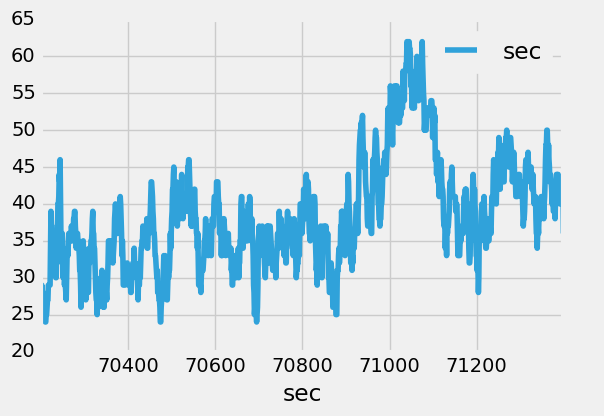

In [186]:
sec[1].plot()

In [187]:
sec_int=[]
for i in range(10863):
    if (agents.iloc[floorbrac[i]]['Z'].unique()[0]).is_integer():
        new=agents.iloc[floorbrac[i]]['sec'].groupby(agents.iloc[floorbrac[i]]['sec']).agg('count')
        x=pd.DataFrame(new)
        sec_int.append(x)


In [189]:
len(sec_int)

16

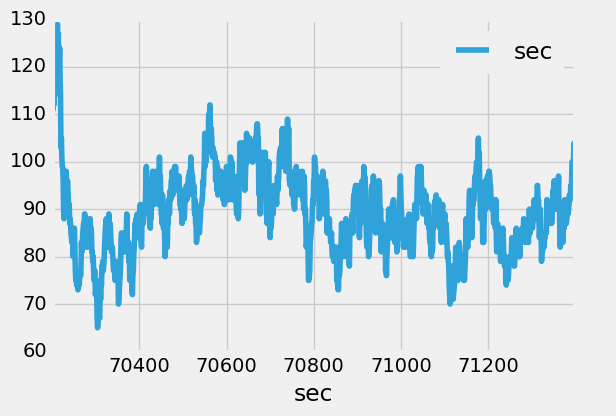

In [190]:
sec_int[0].plot()

## ENTRANCES through each agent entered

In [ ]:
#Question-1 : Through which entrance did each of the agents enter and when??
#Approach - take the minimum time for each agent and the corresponding X,Y,Z coordinate
#Take the euclidean distance of each agent's starting point with each triangle in the each entrance
#there are about 450 triangles in total - so pretty inefficient - but more accurate - we can cross check with mean method later
#take the closest entrance

#taking only the minimum time, that is the time each agent entered the building
df = agents.sort_values("sec").groupby("agent_id", as_index=False).first() #1063 rows in df 
from scipy.spatial import distance
df_list = []
dist = 100
#calculating euclidean distance
for i in df.iterrows(): #each agent going into the loop
    starting_point = (i[1]['X'],i[1]['Y'],(i[1]['Z']-1)) #there is a -1 on Z value to make it in unison with building Z values
    for j in exits.iterrows(): #each exit going into the loop
        for k in j[1][2]: #each triangle going into the loop
            d = distance.euclidean(k,starting_point) #distance from each triangle to starting point of agent
            if d < dist:
                dist = d
                entrance = j[1]['name']
                triangle = k
                
    data = {'agent_id' : i[1]['agent_id'],
            'entry_time' : i[1]['sec'],
            'agent_type' : i[1]['agent_type'],
            'has_luggage' :  i[1]['has_luggage'],
            'is_disabled' : i[1]['is_disabled'],
            'starting_point' : starting_point,
            'entrance' : entrance,
            'dist' : dist,
            'triangle' : triangle}
    df_list.append(data)

df = pd.DataFrame(df_list)
df.head()
    

In [ ]:
counts = df.groupby('entrance').size()
counts
#distribution of entrances among agents
#Subway_Entrance_2_12714    and SouthEntrance1_13925    are the MOST popular

In [ ]:
df.dist.describe()
#distribution of distance

In [ ]:
#NOW we can try the same by calculating the distance from (mean(x),mean(y) and mean(z)) and check if the results match
#taking only the minimum time, that is the time each agent entered the building
df = agents.sort_values("sec").groupby("agent_id", as_index=False).first() #1063 rows in df 
df.head()

## EXITS through each agent left

In [ ]:
#Lets do the same for exits now. 
#Approach - very similar to the entrance - instead of taking the min(time), take the max(time) and calculate distance.
#taking only the maximum time, that is the time each agent exited the building
df = agents.sort_values("sec").groupby("agent_id", as_index=False).last() #1063 rows in df 
from scipy.spatial import distance
df_list = []
dist = 100
#calculating euclidean distance
for i in df.iterrows(): #each agent going into the loop
    last_point = (i[1]['X'],i[1]['Y'],(i[1]['Z']-1))
    for j in exits.iterrows(): #each exit going into the loop
        for k in j[1][2]: #each triangle going into the loop
            d = distance.euclidean(k,last_point) #distance from each triangle to last point of agent
            if d < dist: #if the distance is less than the previously recorded distance
                dist = d
                exit = j[1]['name']
                triangle = k
                
    data = {'agent_id' : i[1]['agent_id'],
            'exit_time' : i[1]['sec'],
            'agent_type' : i[1]['agent_type'],
            'has_luggage' :  i[1]['has_luggage'],
            'is_disabled' : i[1]['is_disabled'],
            'last_point' : last_point,
            'exit' : exit,
            'dist' : dist,
            'triangle' : triangle}
    df_list.append(data)

df = pd.DataFrame(df_list)
df.head()

In [ ]:
counts = df.groupby('exit').size()
counts
#distribution of entrances among agents

In [ ]:
df.dist.describe()
#distribution of distance

In [ ]:
df[df.dist>15].shape
#about 50 agents have a min distane of more than 15 units. Why so?

In [ ]:
!jupyter nbconvert --to script Track_Agents.ipynb